In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import offsetbox

In [ ]:
from sklearn.datasets import fetch_olivetti_faces

faces = fetch_olivetti_faces()

10 diff images, each of 40 distinct people

diff times, lighting orientation

In [ ]:
print(faces.DESCR)

.. _olivetti_faces_dataset:

The Olivetti faces dataset
--------------------------

`This dataset contains a set of face images`_ taken between April 1992 and 
April 1994 at AT&T Laboratories Cambridge. The
:func:`sklearn.datasets.fetch_olivetti_faces` function is the data
fetching / caching function that downloads the data
archive from AT&T.

.. _This dataset contains a set of face images: http://www.cl.cam.ac.uk/research/dtg/attarchive/facedatabase.html

As described on the original website:

    There are ten different images of each of 40 distinct subjects. For some
    subjects, the images were taken at different times, varying the lighting,
    facial expressions (open / closed eyes, smiling / not smiling) and facial
    details (glasses / no glasses). All the images were taken against a dark
    homogeneous background with the subjects in an upright, frontal position 
    (with tolerance for some side movement).

**Data Set Characteristics:**

    =================   ===========

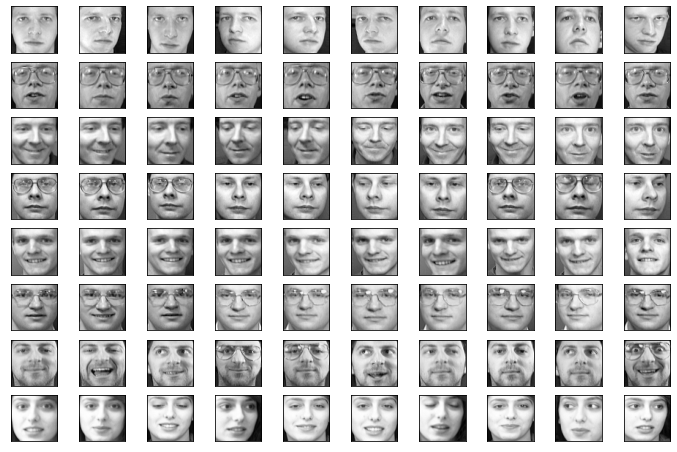

In [ ]:
fig , ax = plt.subplots(8, 10, figsize=(12, 8 ), subplot_kw = dict(xticks = [], yticks = []))

for i, axi in enumerate(ax.flat):
  axi.imshow(faces.images[i], cmap = 'gray')

In [ ]:
x = faces.data
y = faces.target

In [ ]:
x.shape

(400, 4096)

In [ ]:
pd.DataFrame(y).sample(10)

,0
271,27
276,27
388,38
7,0
177,17
302,30
360,36
76,7
392,39
217,21


In [ ]:
from sklearn.decomposition import  PCA
model = PCA(100).fit(x) 

In [ ]:
# we selected 100 after computing variance etc --> refer iris pca

In [ ]:
def plot_components(data, x_new, images = None, ax = None, thumb_frac = 0.05, cmap = 'gray'):

  ax = ax or plt.gca()  # two dim visualalization # x -> 1st dimension of reduced dimesnionality transformed x
  ax.plot(x_new[:,0], x_new[:,1], '.k') # along y 2nd dimension

  if images is not None:

    min_dist = (thumb_frac * max(x_new.max(0) - x_new.min(0)) ) ** 2 # to see how close the images are for display purpose only
    shown_images = np.array( [2 * x_new.max(0)]) # dont display the image if they are vary close

    for i in range(data.shape[0]): # draw a box and put the image inside it

      dist = np.sum((x_new[i] - shown_images) **2, 1)

      if np.min(dist) < min_dist:
        continue

      shown_images = np.vstack([shown_images, x_new[i]])
      imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i], cmap = cmap), x_new[i]) # plots image within the box

      ax.add_artist(imagebox)

In [ ]:
def apply_manifold_learning(x ,method, show_scatter_plot = False): # show_scatter is the plot of image points on the new reduced dim (1st two)

  x_new = method.fit_transform(x) # transform to lower dim

  print('new shape of x:', x_new.shape)
  print()
  print('sample x: \n')
  print(pd.DataFrame(x_new).sample(10))
  print()

  if show_scatter_plot is not False:

    fig, ax = plt.subplots(figsize = (12,10))
    ax.scatter(x_new[: ,0], x_new[:,1], cmap = 'Spectral')
    plt.xlabel('x[0] after transf')
    plt.ylabel('x[1] after transf ')


  # plot actual faces using 1st componets of our reduced dimensions
  fig, ax = plt.subplots(figsize = (12,10)) 
  plot_components(x[:20, :], x_new[:20,:], images = faces.images[:, ::2, ::2])  # plot 20 datapoints, and pass in images of first two individuals
  plt.xlabel('component 1')
  plt.ylabel('component 2')
  

  return method
  

In [ ]:
#   the plot_components will -->
#   plot actual faces using 1st two componets of reduced dimensions
#   on 1st, 2nd axis, we plot first 20 points and pass in images of first 2 individuals

new shape of x: (400, 2)

sample x: 

            0         1
362 -0.036667  0.002067
76   0.039609  0.025057
6    0.029018  0.003650
277  0.041821  0.031436
239 -0.000423 -0.009270
96   0.026681  0.015128
333 -0.177874 -0.039923
190 -0.014042  0.003055
238  0.002370 -0.007702
386 -0.091004 -0.012755



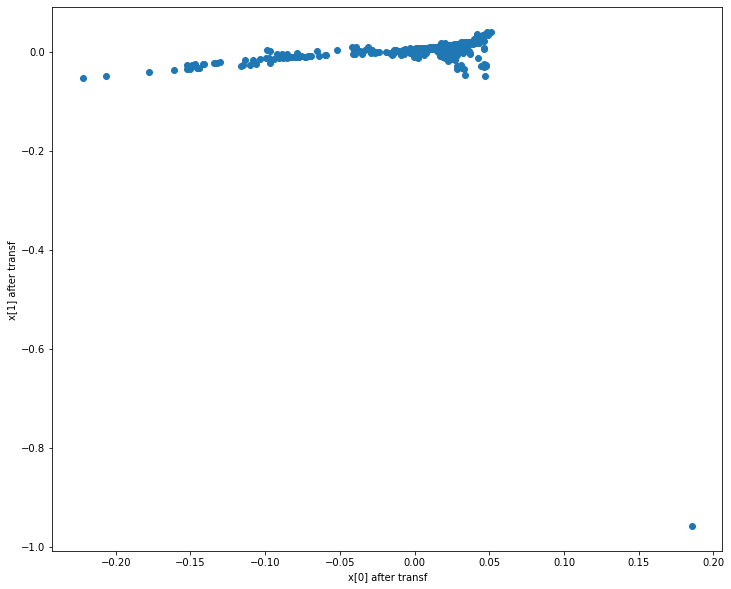

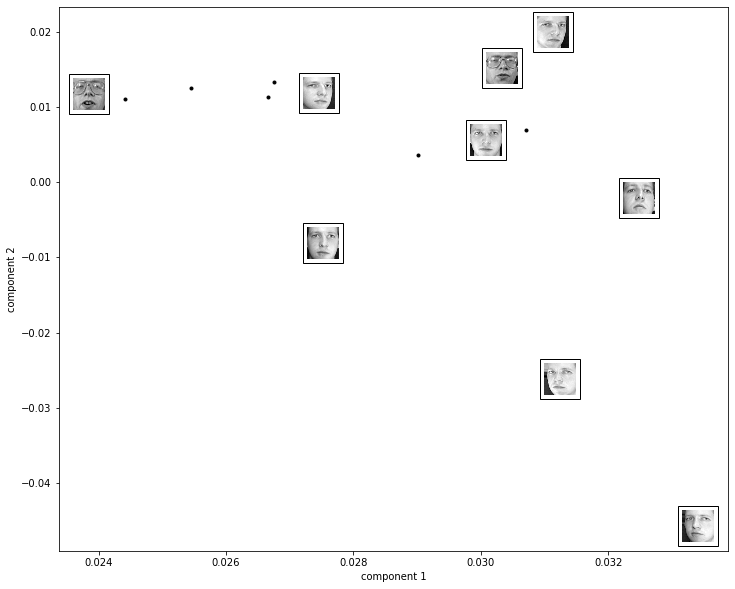

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(x , \
                              LocallyLinearEmbedding(n_neighbors = 30, n_components = 2, method = 'hessian'), show_scatter_plot = True) # hessian is best

# **MDS**

new shape of x: (400, 2)

sample x: 

             0          1
336   9.601180  11.592581
197   4.736923  -7.130848
21   -0.667557   6.900455
9    -9.267233   5.727657
226  -0.995922   0.086347
70  -11.879596  -0.531387
331   4.531471  10.423596
395   0.976775   2.993984
265  -5.850764   5.941323
164  -0.602776  -6.683692



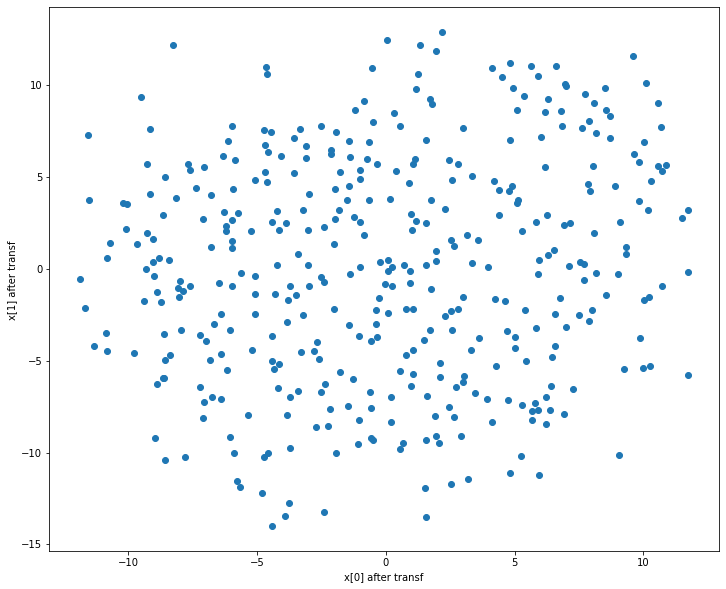

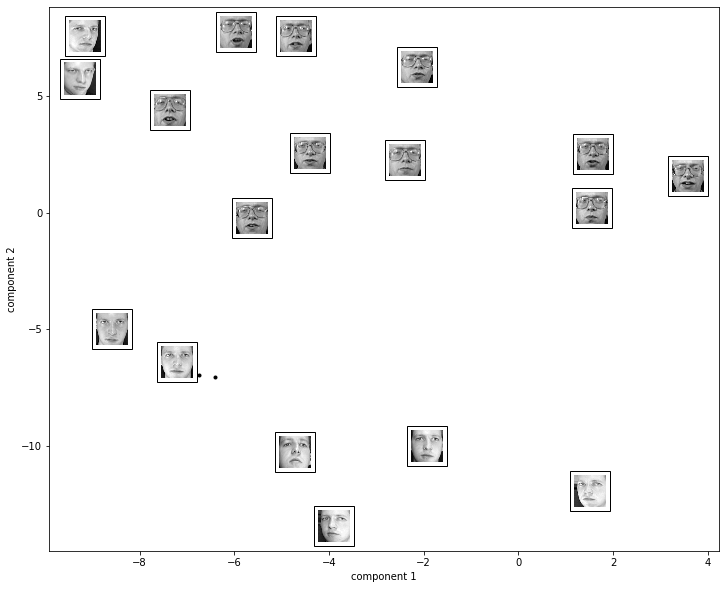

In [ ]:
from sklearn.manifold import MDS

mds = apply_manifold_learning(x, 
                              MDS(n_components = 2, metric = True, n_init = 1, max_iter = 100), show_scatter_plot = True)

In [ ]:
# note that it has tried group together

new shape of x: (400, 2)

sample x: 

             0          1
156 -10.939155   3.477864
390   1.953301  -4.864408
0   -13.169967  11.143567
302   5.445965 -10.368293
378  -2.520903   8.996725
241  -1.913427 -10.012426
233   7.563587  11.213431
305  11.067212  -0.828978
300  11.746023   4.002852
387  21.656484  -3.184307



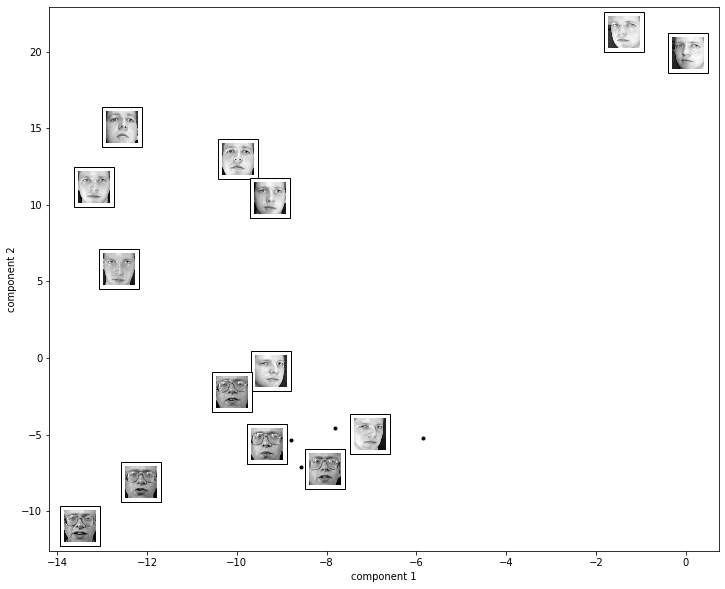

In [ ]:
from sklearn.manifold import Isomap 

isomap = apply_manifold_learning(x, Isomap(n_neighbors = 10, n_components = 2))

In [ ]:
# this is better as the individual of same face are formed as a cluster

new shape of x: (400, 2)

sample x: 

            0         1
131 -0.004624 -0.015958
276 -0.006566 -0.019482
156 -0.005081 -0.017196
229 -0.006899 -0.017270
202 -0.006393  0.004597
170 -0.006440 -0.018661
94  -0.004514 -0.015754
282 -0.005204  0.035767
210 -0.003616  0.171745
228 -0.006568 -0.016346



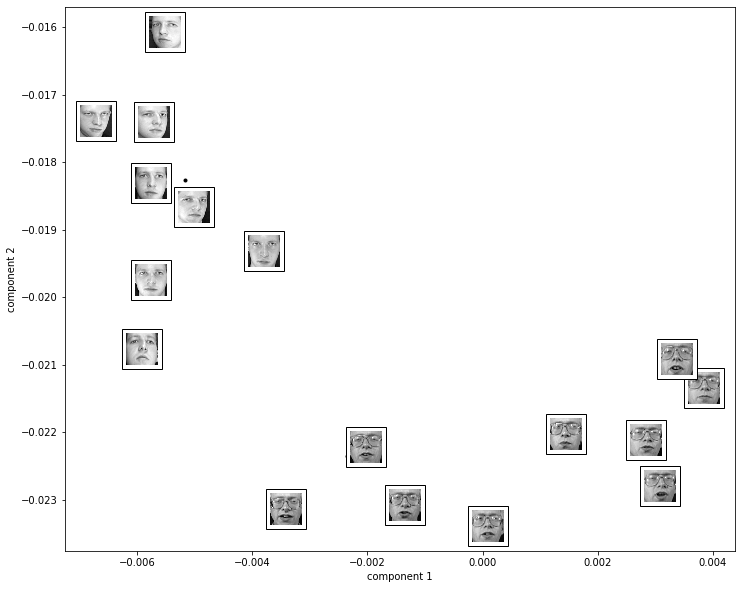

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = apply_manifold_learning(x , \
                              LocallyLinearEmbedding(n_neighbors = 10, n_components = 2, method = 'hessian')) # hessian is best

# **PERFECT SEGREGATION is acheived by LLE!**

new shape of x: (400, 2)

sample x: 

             0          1
63  -22.283857 -15.161773
133  -4.311167 -11.023533
295  12.768337   7.787358
29   -5.118717  -6.923993
334  19.976414  29.185816
4     2.616033 -13.759990
325  18.771818  13.754848
306  12.165551  11.357550
162   8.695856 -11.125414
111   6.085497   6.099177



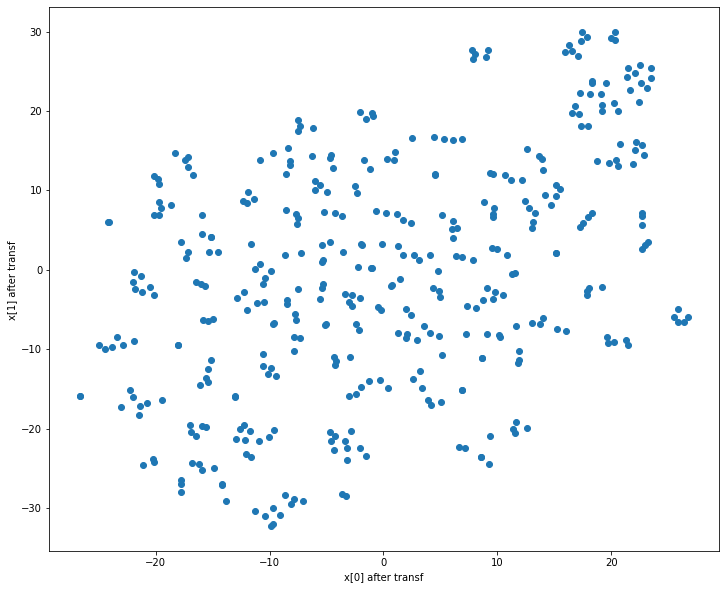

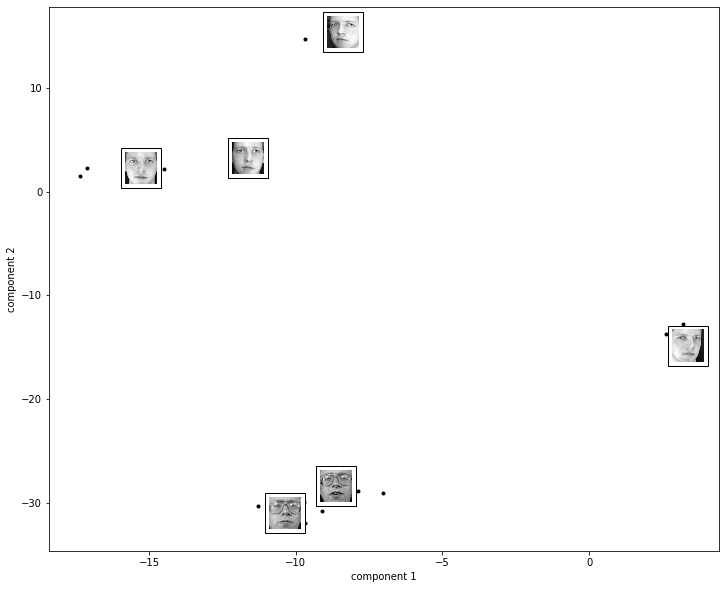

In [ ]:
from sklearn.manifold import TSNE

tsne = apply_manifold_learning(x, TSNE(n_components = 2, init = 'pca', random_state = 0), show_scatter_plot=True)

new shape of x: (400, 2)

sample x: 

            0         1
348 -0.003103  0.019588
311 -0.005539 -0.012094
186 -0.006657 -0.008860
379 -0.000460 -0.002957
94  -0.004341 -0.001508
98  -0.004515  0.020137
362  0.001786  0.002429
217  0.021963  0.000523
242 -0.003939 -0.006076
4   -0.005441 -0.003495



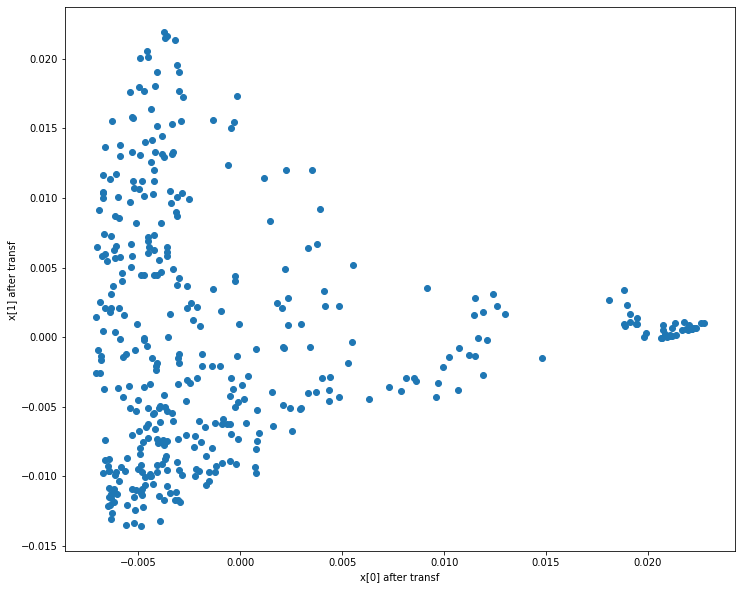

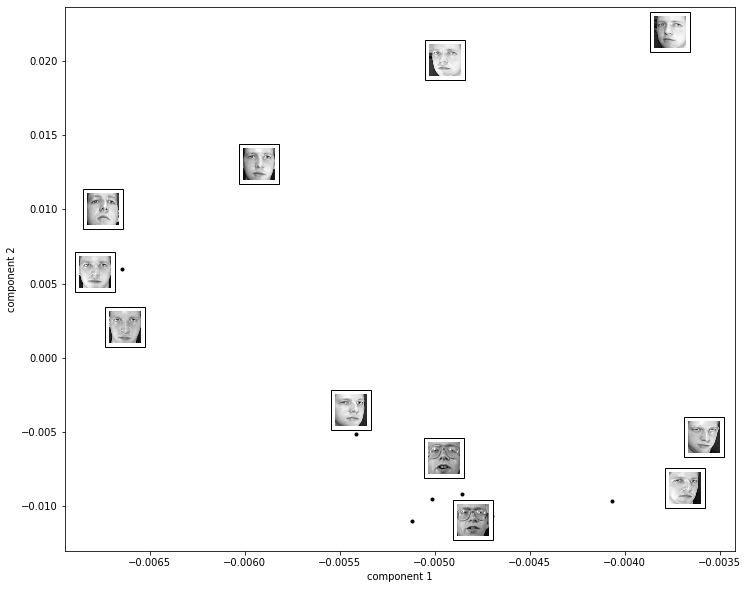

In [ ]:
from sklearn.manifold import SpectralEmbedding # affinity matrix basd on nearest neighbors

spectral_em = apply_manifold_learning(x ,\
                                      SpectralEmbedding(n_components = 2, random_state = 0, eigen_solver = 'arpack'), show_scatter_plot = True)